# NLTK program pro analýzu sentimentu


 Textová analýza se týká procesu analýzy a získávání smysluplných poznatků z nestrukturovaných textových dat. Jedním z nejdůležitějších součástí analýzy textu je analýza sentimentu, která zahrnuje určení emocionálního vyznění textu.

**Předzpracování textu**
Předzpracování textu je zásadním krokem při provádění analýzy sentimentu, protože pomáhá čistit a normalizovat textová data, což usnadňuje analýzu.

**Tokenizace**
Tokenizace je krok předběžného zpracování textu v analýze sentimentu, který zahrnuje rozdělení textu na jednotlivá slova nebo tokeny.

**Stop words**
Odstranění "stop words" je zásadním krokem předzpracování textu v analýze sentimentu, který zahrnuje odstranění běžných a irelevantních slov, která pravděpodobně nevyjadřují mnoho.
Stop words jsou slova, která jsou v jazyce velmi běžná a nemají velký význam, jako například „a“, „to“, „z“.

**Stemming a lemmatizace**
Stemming jsou techniky používané k redukci slov na jejich kořenové formy. Například slovo „jumping“ by bylo odvozeno od slova „jump“.
Lemmatizace však zahrnuje redukci slov na jejich základní formu na základě jejich slovních druhů. Například slovo „jumped“ by bylo lemmatizováno na „jump“,

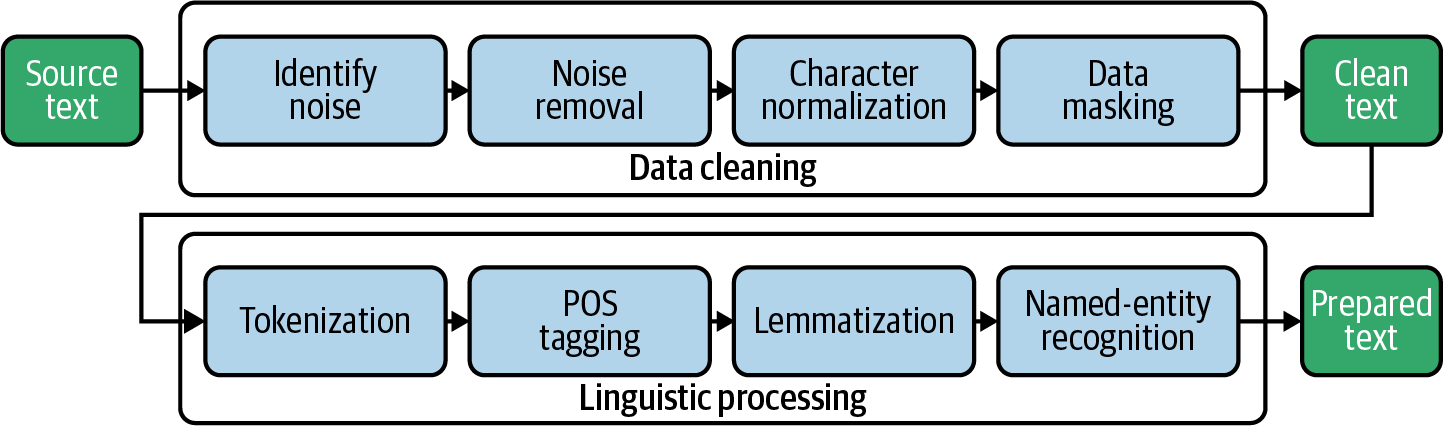

1) Příprava prostředí: Importuje potřebné knihovny, včetně pandas pro práci s daty a NLTK pro zpracování přirozeného jazyka.

2)Stahování dat: Stahuje potřebná data pro analýzu z NLTK.

3)Načítání dat: Načítá dataset pomocí pandas.

4)Předzpracování dat: Aplikuje řadu kroků předzpracování na text recenzí, včetně tokenizace, odstranění stop words a lematizace.

5)Inicializace sentiment analyzeru: Vytváří instanci NLTK Vader sentiment analyzer.

6)Funkce pro získání sentimentu: Definuje funkci, která používá sentimentní analyzátor k určení, zda je text pozitivní nebo negativní.

7)Aplikace sentiment funkce: Aplikuje vytvořenou funkci na text recenzí a výsledky ukládá do nového sloupce v datasetu.

8)Hodnocení modelu: Vytiskne matice záměn a klasifikační report, což jsou metriky pro vyhodnocení výkonnosti modelu sentimentu.

In [ ]:
import pandas as pd
import nltk
from nltk import download

# Download NLTK data
nltk.download('all')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, classification_report

Pandas pro zpracování dat, nltk pro natural language processing a SentimentIntensityAnalyzer pro analýzu sentimentu.

In [2]:
# Load the amazon review dataset
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

In [3]:
# Preprocess the reviewText column
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text
df['reviewText'] = df['reviewText'].apply(preprocess_text)

Funkce **preprocess_text**, ve které nejprve tokenizujeme dokumenty pomocí funkce word_tokenize z NLTK, poté odstraníme "step words" pomocí modulu stepwords z NLTK a nakonec lemmatizujeme filtrované_tokeny pomocí WordNetLemmatizer z NLTK.

In [4]:
# Initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [5]:
# Define a function to get sentiment
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

Tato funkce umožňuje snadno aplikovat sentiment analýzu na text pomocí NLTK "sentiment analyzer" a klasifikovat text jako pozitivní (1) nebo negativní (0) na základě scores pozitivitu ('pos').

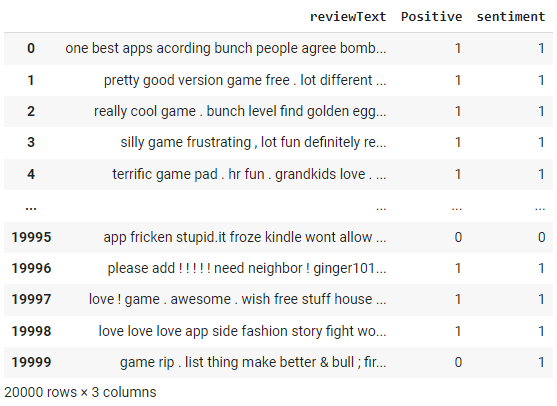

In [6]:
# Apply the sentiment function to the reviewText column
df['sentiment'] = df['reviewText'].apply(get_sentiment)

# Evaluate the model
print(confusion_matrix(df['Positive'], df['sentiment']))
print(classification_report(df['Positive'], df['sentiment']))


[[ 1131  3636]
 [  576 14657]]
              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



# Výklad výsledků:

Matice záměn: Ukazuje, kolik pozitivních (1) a negativních (0) případů bylo správně a nesprávně klasifikováno. Například, 1131 případů bylo správně klasifikováno jako negativní (0), a 14657 případů bylo správně klasifikováno jako pozitivní (1).

Precision: Ze všech případů, které byly klasifikovány jako pozitivní, je 80 % skutečně pozitivních. (precision pro pozitivní třídu)

Recall: Ze všech skutečně pozitivních případů bylo 96 % klasifikováno správně. (recall pro pozitivní třídu)

F1-score: Kombinace precision a recall do jednoho čísla. F1-score je vážený průměr precision a recall.

Accuracy: 79 % přesnost v klasifikaci všech případů.

Celkově ukazují výsledky, že model dosahuje vysoké přesnosti ve správném rozpoznávání pozitivních případů. Je to důležitý aspekt, který může být zohledněn při dalším vylepšování modelu.